In [27]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [12]:
# Import data 
dataset= pd.read_csv('/Users/sahasrabalaji/Desktop/SAHASRA/Elevate Labs/Aug 12 2025/Iris.csv')

In [13]:
# Understand data
print(dataset.shape)

(150, 6)


In [14]:
print(dataset.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [15]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [16]:
print(dataset.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [17]:
print(dataset.nunique())

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64


In [18]:
print(dataset.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [19]:
dataset.drop(columns='Id', inplace=True)

In [20]:
# Separate feature and target
X = dataset.drop(columns='Species')
y = dataset['Species']

In [21]:
# Normalize the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

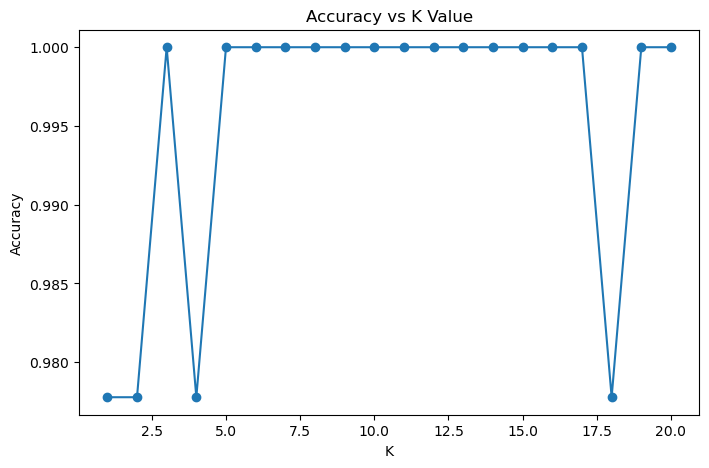

In [25]:
# KNN classification
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [24]:
# Evaluating the best model
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best K value: {best_k}")

# Retrain with best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", conf_mat)

Best K value: 3
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


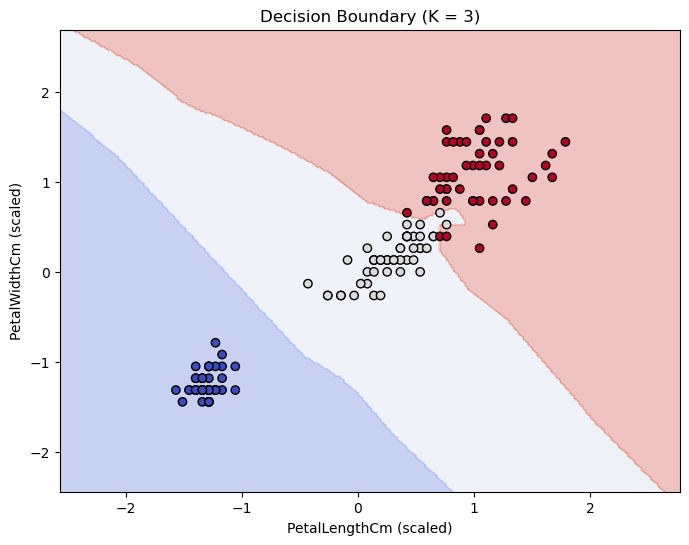

In [28]:
# Encode target labels to numbers
le = LabelEncoder()
y_vis_encoded = le.fit_transform(y_vis)

# Predict over the grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])

Z_encoded = le.transform(Z) 

# Reshape to match the meshgrid
Z_encoded = Z_encoded.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_encoded, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis_encoded, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('PetalLengthCm (scaled)')
plt.ylabel('PetalWidthCm (scaled)')
plt.title(f'Decision Boundary (K = {best_k})')
plt.show()
